In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [94]:
# Reading the Dataset
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [95]:
# getting shape
df.shape

(500, 9)

In [96]:
# sample
df.sample(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
84,85,340,115,5,4.5,4.5,9.45,1,0.94
277,278,320,101,2,2.5,3.0,8.62,0,0.70
59,60,311,104,2,2.0,2.0,8.30,0,0.42


In [97]:
# checking null values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [98]:
# Drop Serial No. Column
df.drop(columns=["Serial No."],axis=1,inplace=True)

In [99]:
# Columns without Serial No.
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [100]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [101]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [102]:
X = scaler.fit_transform(X)
X

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [103]:
# Splitting into Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=0)

In [104]:
# Defining Deep Learning Model
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [105]:
X_train.shape

(450, 7)

In [106]:
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176 (704.00 B)

 Trainable params: 176 (704.00 B)

 Non-trainable params: 0 (0.00 B)

In [109]:
# Compiling Model 
model.compile(optimizer='Adam',loss='mean_squared_error')

In [110]:
history = model.fit(X_train,y_train, epochs=100, batch_size = 10, verbose=1, validation_split = 0.2)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6965 - val_loss: 0.4794
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3994 - val_loss: 0.2759
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1821 - val_loss: 0.0659
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0432 - val_loss: 0.0382
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0257 - val_loss: 0.0313
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0208 - val_loss: 0.0257
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169 - val_loss: 0.0220
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0136 - val_loss: 0.0191
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0124 - val_loss: 0.0170
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114 - val_loss: 0.0155
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0103 - val_loss: 0.0140
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

In [111]:
# Predicting 
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [112]:
# Testing
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7910929908679676

In [113]:
history.history

{'loss': [0.615484356880188,
  0.36481302976608276,
  0.13374169170856476,
  0.03575737029314041,
  0.026109838858246803,
  0.020724337548017502,
  0.01696154661476612,
  0.014584267511963844,
  0.012700442224740982,
  0.011313209310173988,
  0.010210596956312656,
  0.009220415726304054,
  0.0085578802973032,
  0.00810003187507391,
  0.007886042818427086,
  0.0077169365249574184,
  0.0075347330421209335,
  0.007423181552439928,
  0.007244281470775604,
  0.007177600637078285,
  0.007093760650604963,
  0.006982977502048016,
  0.006881666835397482,
  0.006793812848627567,
  0.0067172423005104065,
  0.0066419122740626335,
  0.0065420931205153465,
  0.0064554037526249886,
  0.006330444943159819,
  0.006309757474809885,
  0.006227725651115179,
  0.00611885916441679,
  0.006103126797825098,
  0.006036824081093073,
  0.00592366186901927,
  0.005998117383569479,
  0.005830574780702591,
  0.005791489500552416,
  0.005693929269909859,
  0.005668183788657188,
  0.005612149368971586,
  0.0056114182

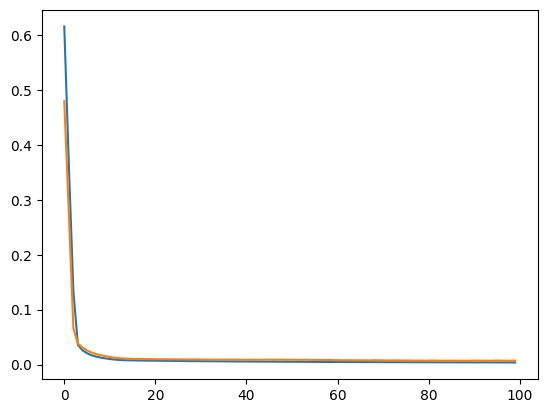

In [114]:
# Visualizing
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])